Import necessary modules.

In [1]:
# Import correct modules using accurate aliases
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from datetime import datetime

%matplotlib inline

Import all datasets.

In [71]:
# import merged_df
merged_df1 = pd.read_csv("../datasets/merged_df1.csv")

# Convert the time column to datetime format
merged_df1['time'] = pd.to_datetime(merged_df1['time'])

In [68]:
merged_df1.head(3)

,time,dengue_cases,denv_1,denv_2,denv_3,denv_4,Mean Temperature (°C),Mean Wind Speed (km/h),Daily Rainfall Total (mm),Maximum Temperature (°C),Max Wind Speed (km/h),Minimum Temperature (°C),recent_cases_in_cluster_central,recent_cases_in_cluster_east,recent_cases_in_cluster_north,recent_cases_in_cluster_north-east,recent_cases_in_cluster_west,google_trends
0,2018-04-08,38,0.0,0.505,0.484,0.011,28.528571,10.714286,0.742857,33.8,36.7,25.5,2.0,10.0,2.0,2.0,7.0,20
1,2018-04-15,56,0.0,0.505,0.484,0.011,28.914286,9.828571,2.057143,34.4,38.2,24.6,7.0,6.0,1.0,2.0,6.0,18
2,2018-04-22,55,0.0,0.505,0.484,0.011,28.142857,7.700000,0.371429,34.3,37.1,25.5,8.0,7.0,1.0,2.0,11.0,21


In [72]:
merged_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   time                                135 non-null    datetime64[ns]
 1   dengue_cases                        135 non-null    int64         
 2   denv_1                              135 non-null    float64       
 3   denv_2                              135 non-null    float64       
 4   denv_3                              135 non-null    float64       
 5   denv_4                              135 non-null    float64       
 6   Mean Temperature (°C)               135 non-null    float64       
 7   Mean Wind Speed (km/h)              135 non-null    float64       
 8   Daily Rainfall Total (mm)           135 non-null    float64       
 9   Maximum Temperature (°C)            135 non-null    float64       
 10  Max Wind Speed (km/h)     

---
### Regression Line to Explore Relationships between Features

/var/folders/1k/lmhy97td4h17yfgn7vlzp0ph0000gp/T/ipykernel_27192/1365568668.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(merged_df1.corr(), dtype=None)
/var/folders/1k/lmhy97td4h17yfgn7vlzp0ph0000gp/T/ipykernel_27192/1365568668.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_df1.corr(), vmin=0.0, vmax=1.0, mask=mask, cmap='cool', annot=True, linewidths = 0.3)


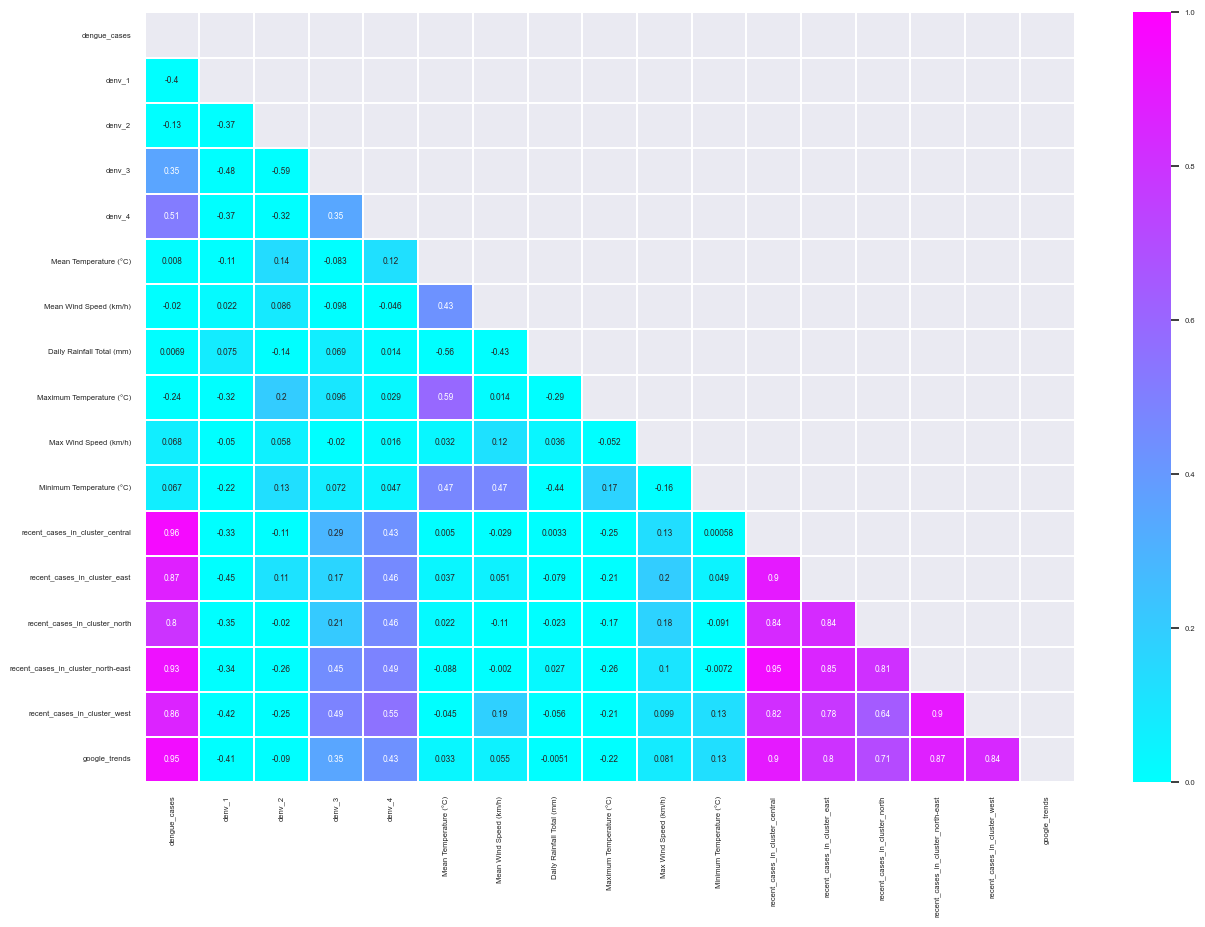

In [106]:
# First use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features
# Establish figure size
fig = plt.subplots(figsize=(15, 10))

# Create a mask for the top half (repeated values) of the heat map
mask = np.zeros_like(merged_df1.corr(), dtype=None)
mask[np.triu_indices_from(mask)]=True

# Plot the correlation heat map
sns.heatmap(merged_df1.corr(), vmin=0.0, vmax=1.0, mask=mask, cmap='cool', annot=True, linewidths = 0.3)
sns.set(font_scale=0.75)

# Display the heat map
plt.show();

---
### Time Series Line Plots

#### Minimum, Maximum, Mean Temperature Data collected at Changi Station from 2018 to 2020

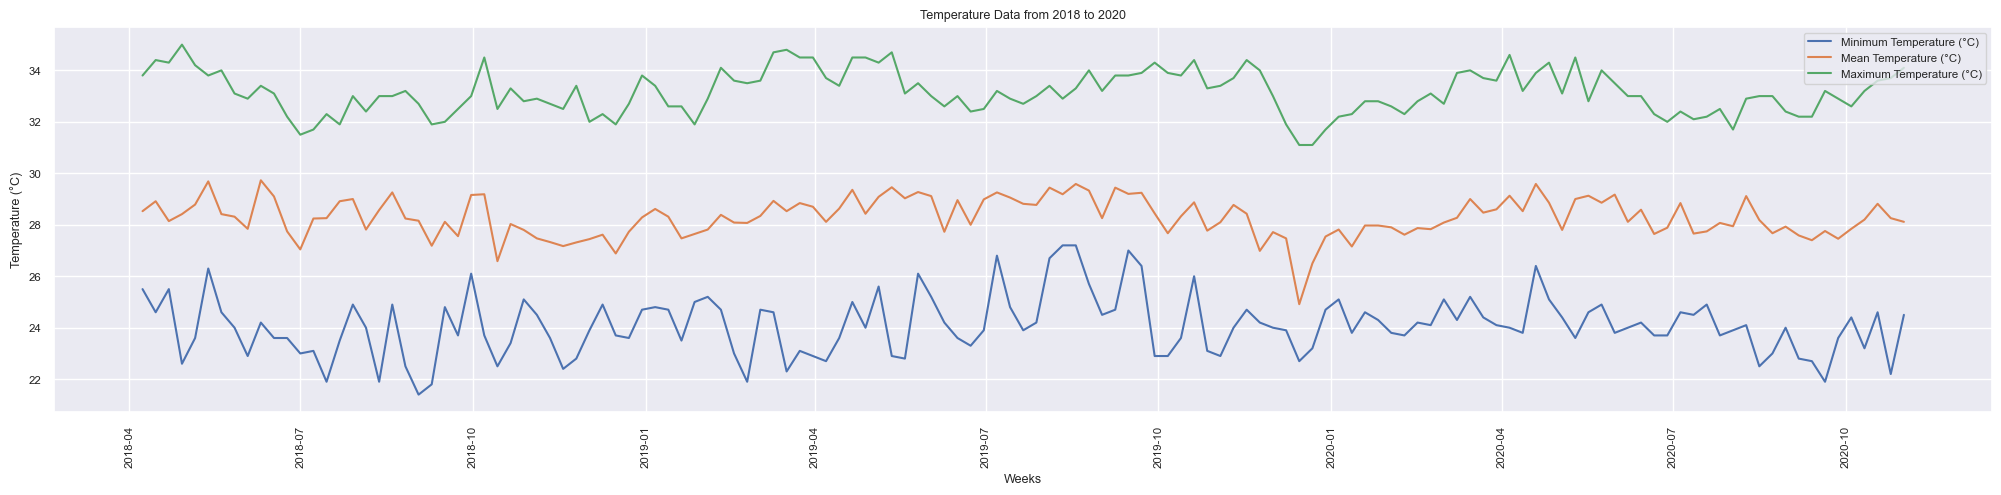

In [120]:
# Temperature Data over the weeks, 2018 -2020
plt.figure(figsize=(25, 5))

# Define X and y
x = merged_df1['time']
y = merged_df1[['Minimum Temperature (°C)', 'Mean Temperature (°C)', 'Maximum Temperature (°C)']]

plt.plot(x,y)

plt.title(label='Temperature Data from 2018 to 2020')
plt.xlabel(xlabel='Weeks')
plt.ylabel(ylabel='Temperature (°C)')
plt.xticks(rotation=90)

# Add legend
plt.legend(['Minimum Temperature (°C)', 'Mean Temperature (°C)', 'Maximum Temperature (°C)'], loc='upper right');

#### Mean and Maximum Wind Speed Data collected at Changi Station from 2018 to 2020

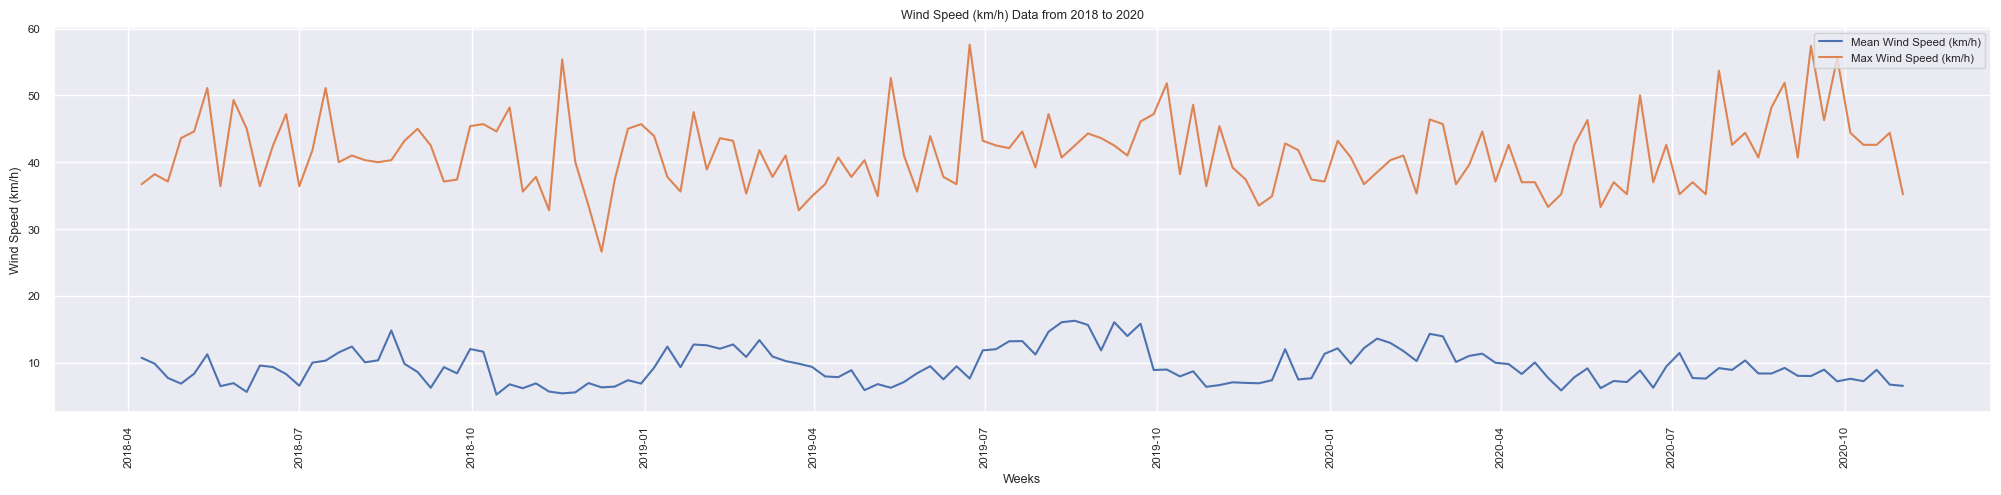

In [118]:
# Wind Speed Data over the weeks, 2018-2020
plt.figure(figsize=(25, 5))

# Define X and y
x = merged_df1['time']
y = merged_df1[['Mean Wind Speed (km/h)', 'Max Wind Speed (km/h)']]

plt.plot(x,y)

plt.title(label='Wind Speed (km/h) Data from 2018 to 2020')
plt.xlabel(xlabel='Weeks')
plt.ylabel(ylabel='Wind Speed (km/h)')
plt.xticks(rotation=90)

# Add legend
plt.legend(['Mean Wind Speed (km/h)', 'Max Wind Speed (km/h)'], loc='upper right');

#### Daily Rainfall Total (mm) collected at Changi Station from 2018 to 2020

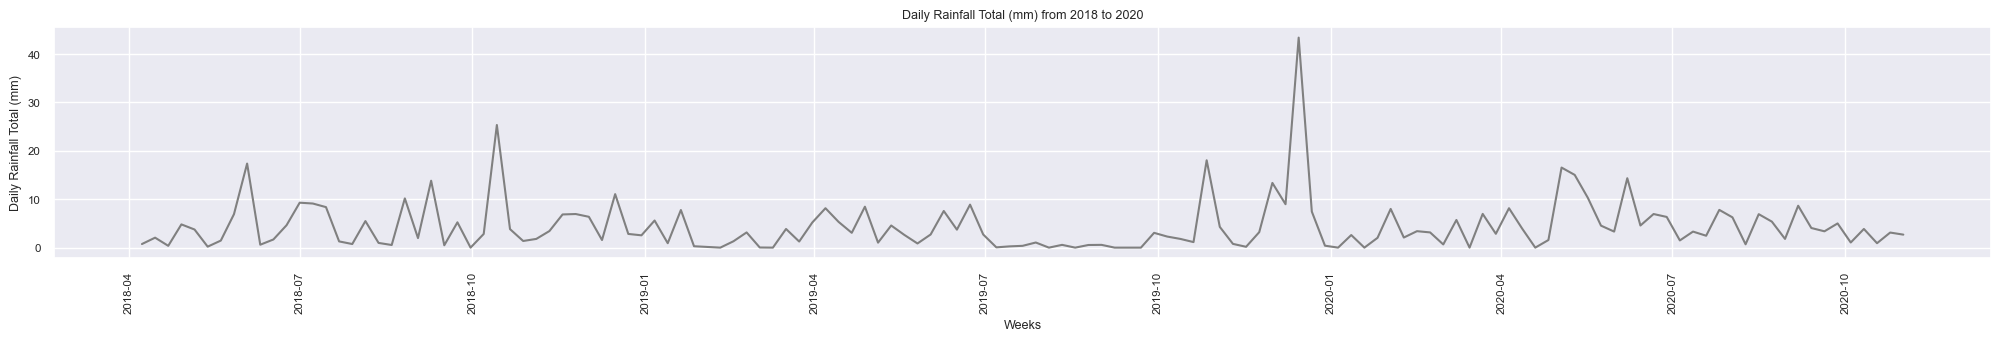

In [125]:
# Daily Rainfall Total(mm) over the weeks, 2018-2020
plt.figure(figsize=(25, 3))

# Define X and y
x = merged_df1['time']
y = merged_df1['Daily Rainfall Total (mm)']

plt.plot(x,y, color='grey')

plt.title(label='Daily Rainfall Total (mm) from 2018 to 2020')
plt.xlabel(xlabel='Weeks')
plt.ylabel(ylabel='Daily Rainfall Total (mm)')
plt.xticks(rotation=90);

#### Combined Serotype Data from 2018 to 2020

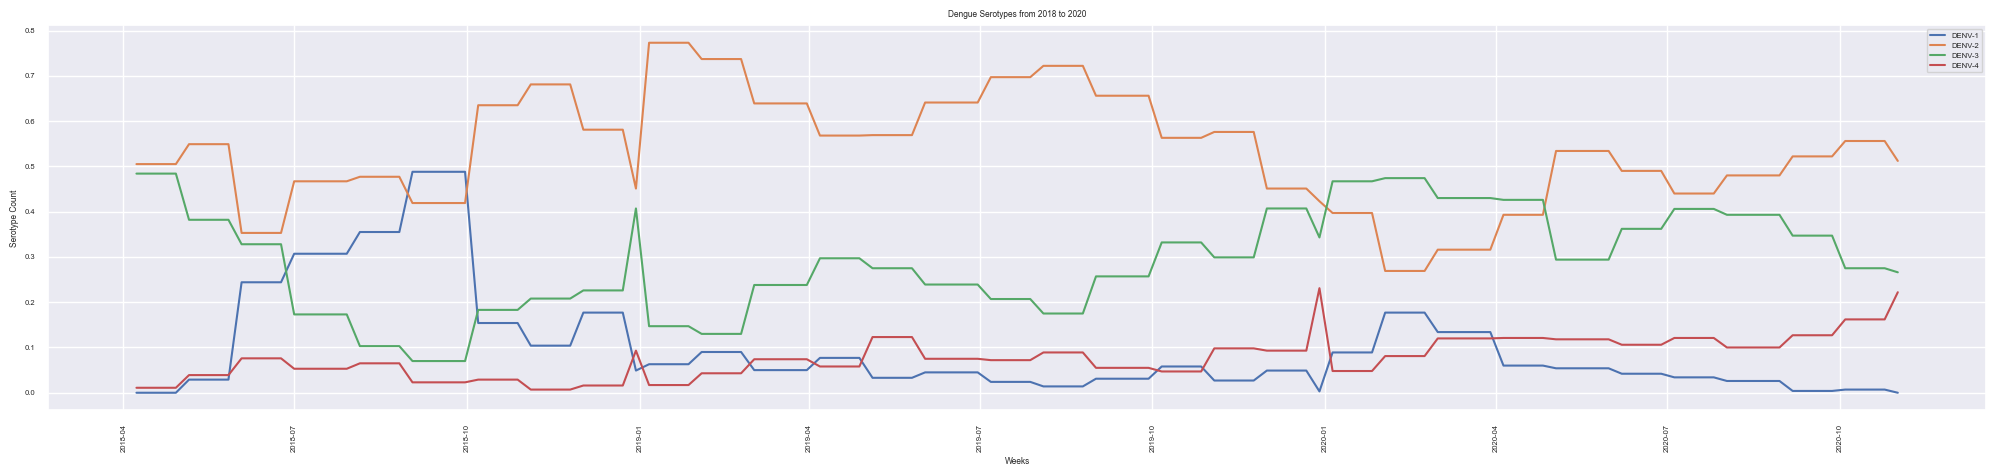

In [11]:
# Zoom into specific time period 2018 - 2020
# Dengue Cases over the weeks
plt.figure(figsize=(25, 5))

# Define X and y
x = merged_df1['time']
y = merged_df1[['denv_1', 'denv_2', 'denv_3', 'denv_4']]

plt.plot(x,y)

plt.title(label='Dengue Serotypes from 2018 to 2020')
plt.xlabel(xlabel='Weeks')
plt.ylabel(ylabel='Serotype Count')
plt.xticks(rotation=90)

# Add legend
plt.legend(['DENV-1', 'DENV-2', 'DENV-3', 'DENV-4'], loc='upper right');

#### Total Dengue Cases by Region from 2018 to 2020

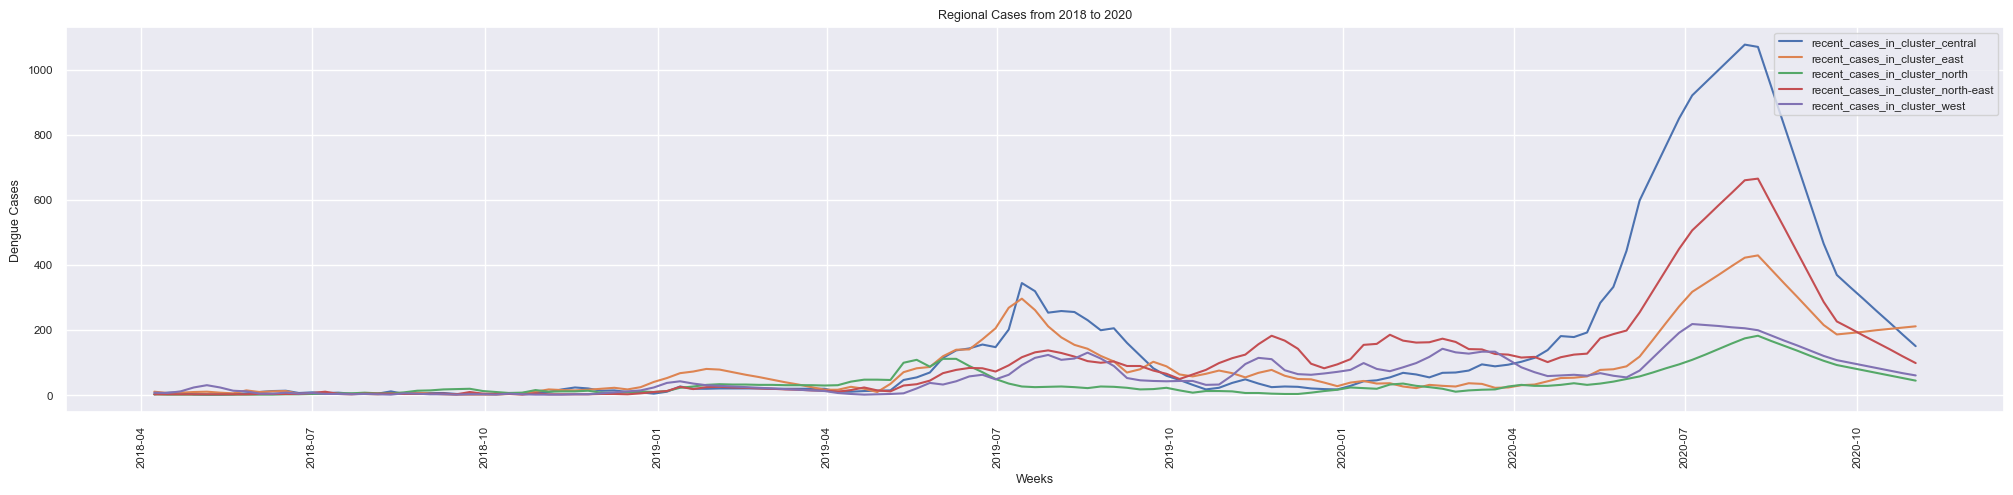

In [134]:
# Regional Dengue Cases over the weeks, 2018 -2020
plt.figure(figsize=(25, 5))

# Define X and y
x = merged_df1['time']
y = merged_df1[['recent_cases_in_cluster_central',
               'recent_cases_in_cluster_east', 
               'recent_cases_in_cluster_north',
               'recent_cases_in_cluster_north-east',
               'recent_cases_in_cluster_west']]

plt.plot(x,y)

plt.title(label='Regional Cases from 2018 to 2020')
plt.xlabel(xlabel='Weeks')
plt.ylabel(ylabel='Dengue Cases')
plt.xticks(rotation=90)

# Add legend
plt.legend(['recent_cases_in_cluster_central',
            'recent_cases_in_cluster_east', 
            'recent_cases_in_cluster_north',
            'recent_cases_in_cluster_north-east',
            'recent_cases_in_cluster_west'], loc='upper right');

#### Google Search Trends from 2018 to 2020

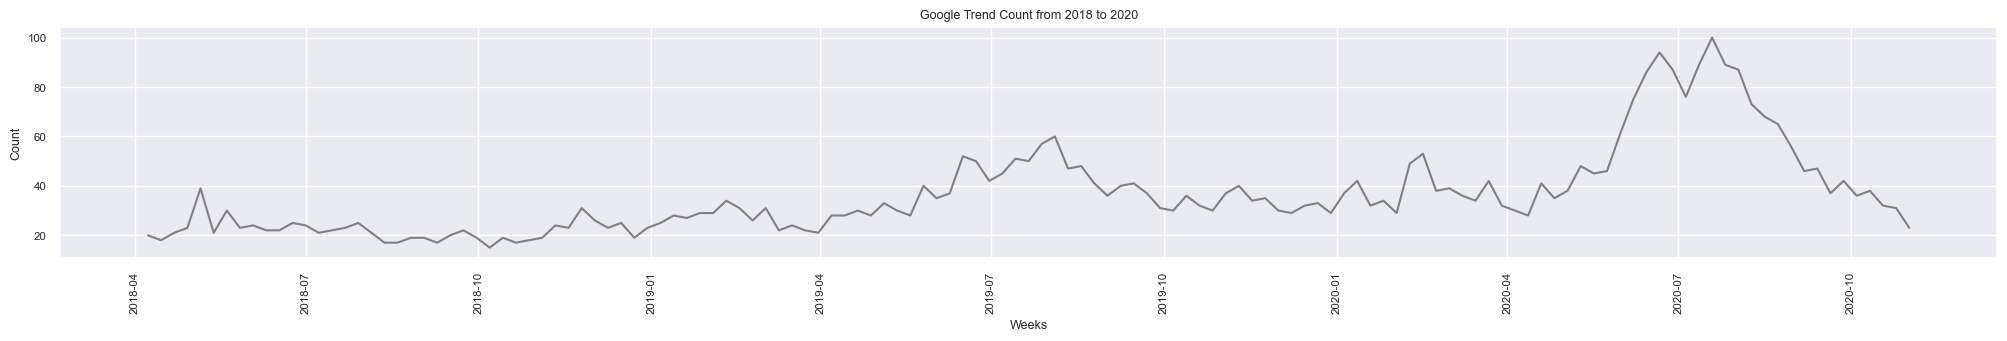

In [135]:
# Daily Rainfall Total(mm) over the weeks, 2018-2020
plt.figure(figsize=(25, 3))

# Define X and y
x = merged_df1['time']
y = merged_df1['google_trends']

plt.plot(x,y, color='grey')

plt.title(label='Google Trend Count from 2018 to 2020')
plt.xlabel(xlabel='Weeks')
plt.ylabel(ylabel='Count')
plt.xticks(rotation=90);

---
### Calendar Heatmaps

---
### Folium Plot

---
### Time Series Boxplot 
> * Yearly Trend

---
### Time Series Boxplot 
> * Monthly Trend

---
### Time Series Boxplot 
> * Weekly Trend

---
### Time Series Lag ScatterPlots

---
### Visualise Distributions using Histograms